<a href="https://colab.research.google.com/github/kiran-bhandari16/LSTM-Stock-Price-Prediciton/blob/main/LSTM_Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [1]:
# !pip install tensorflow

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, Dropout
import os
import tensorflow as tf

In [3]:
from google.colab import files
uploaded = files.upload()

Saving updated-sbl-data.csv to updated-sbl-data.csv


In [4]:
# df = pd.read_csv("sbl_price.csv")
# df.head()

In [5]:
# df.drop('S.N.',axis=1, inplace=True)

In [6]:
# df.drop(['% Change','Qty'],axis=1, inplace=True)

In [7]:
# df.to_csv("updated-sbl-data.csv", index=False)

In [8]:
df = pd.read_csv("updated-sbl-data.csv")
df.head()

,Date,Open,High,Low,Ltp,Turnover
0,2022-06-29,318.90,318.90,310.00,315.00,"6,127,716.20"
1,2022-06-28,312.00,316.50,306.00,313.00,"5,707,986.70"
2,2022-06-27,322.00,325.00,310.00,312.00,"11,125,995.50"
3,2022-06-26,312.90,320.00,308.00,320.00,"28,577,745.10"
4,2022-06-24,305.00,310.00,298.20,307.00,"25,399,389.80"


**Exploring the dataset**

In [9]:
m = df.set_index("Date",drop=True)
m = m[["High","Low","Ltp"]]
m

,High,Low,Ltp
Date,,,
2022-06-29,318.90,310.00,315.00
2022-06-28,316.50,306.00,313.00
2022-06-27,325.00,310.00,312.00
2022-06-26,320.00,308.00,320.00
2022-06-24,310.00,298.20,307.00
...,...,...,...
2013-03-21,311.00,303.00,308.00
2013-03-20,312.00,306.00,306.00
2013-03-19,312.00,309.00,312.00


In [10]:
df["Low"] = df["Low"].str.replace(",","")
low = df["Low"].apply(lambda x: float(x))

In [11]:
df["High"] = df["High"].str.replace(",","")
high = df["High"].apply(lambda x: float(x))

In [12]:
df["Open"] = df["Open"].str.replace(",","")
open = df["Open"].apply(lambda x: float(x))

In [13]:
df["Ltp"] = df["Ltp"].str.replace(",","")
ltp = df["Ltp"].apply(lambda x: float(x))

**Data Visualization**

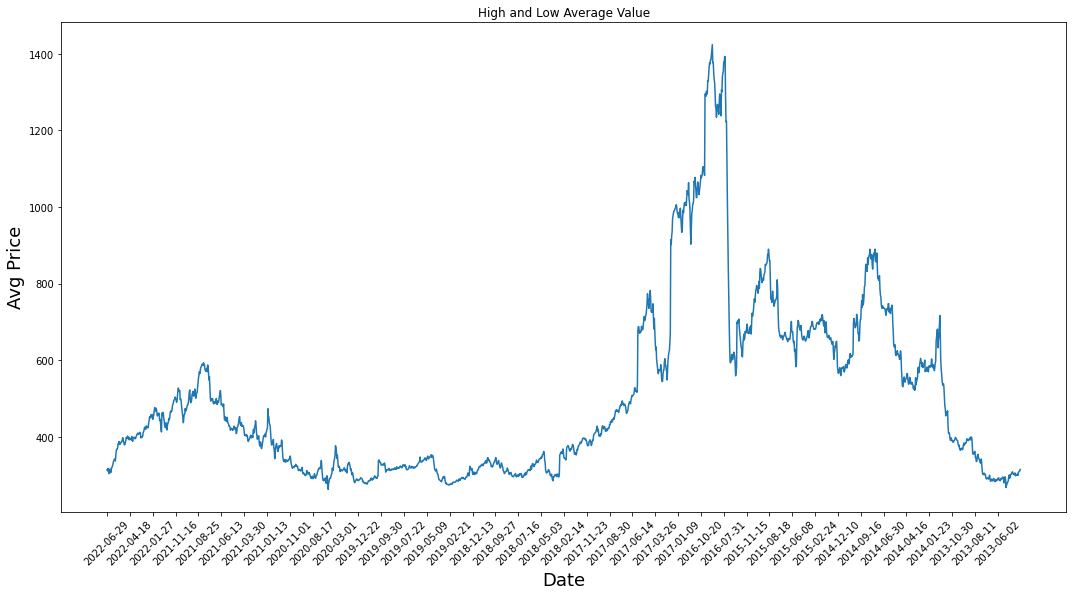

In [14]:
plt.figure(figsize = (18,9))
plt.plot(range(df.shape[0]),(low + high)/2.0)
plt.xticks(range(0,df.shape[0],50),df['Date'].loc[::50],rotation=45)
plt.title("High and Low Average Value")
plt.xlabel('Date',fontsize=18)
plt.ylabel('Avg Price',fontsize=18)
plt.show()

In [15]:
# data = df.set_index("Date",drop=True)
# data = data[["Open","High","Low","Ltp","Turnover"]]
# data

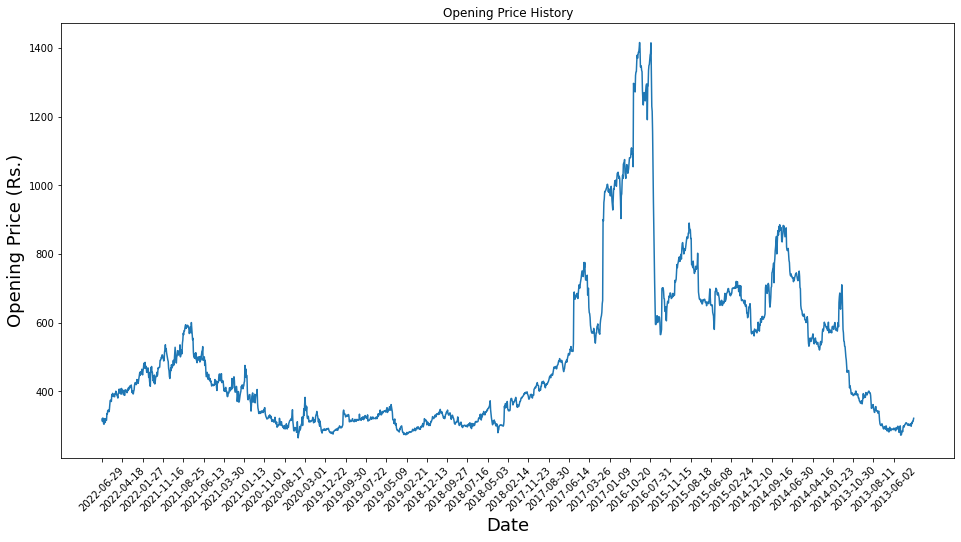

In [16]:
## Data Visualization
plt.figure(figsize=(16,8))
plt.title("Opening Price History")
plt.plot(range(df.shape[0]),(open))
plt.xticks(range(0,df.shape[0],50),df['Date'].loc[::50],rotation=45)
plt.xlabel("Date", fontsize=18)
plt.ylabel("Opening Price (Rs.)", fontsize=18)
plt.show()

In [17]:
# ## Data Visualization
# plt.figure(figsize=(16,8))
# plt.title("Last Trading Price History")
# plt.plot(range(data.shape[0]),(ltp)/2.0)
# plt.xticks(range(0,df.shape[0],50),df['Date'].loc[::50],rotation=45)
# plt.xlabel("Date", fontsize=18)
# plt.ylabel("Last Trading Price (Rs.)", fontsize=18)
# plt.show()

In [18]:
## creating a new dataframe with one "Open" column
data = df.filter(["Open"])
data

,Open
0,318.90
1,312.00
2,322.00
3,312.90
4,305.00
...,...
1995,306.00
1996,312.00
1997,311.00
1998,315.00


In [19]:
## converting data into numpy array
data = open.values
data = data.reshape(-1,1)
data.shape

(2000, 1)

In [20]:
data

array([[318.9],
       [312. ],
       [322. ],
       ...,
       [311. ],
       [315. ],
       [321. ]])

In [21]:
training = np.array(data[:int(data.shape[0]*0.8)])
testing = np.array(data[int(data.shape[0]*0.8)-50:])

In [22]:
training.shape, testing.shape

((1600, 1), (450, 1))

**Preprocessing the dataset**

In [23]:
scaler = MinMaxScaler(feature_range=(0,1))
train = scaler.fit_transform(training)
train[:5]

array([[0.04765625],
       [0.04166667],
       [0.05034722],
       [0.04244792],
       [0.03559028]])

In [24]:
test = scaler.transform(testing)
test[:5]

array([[0.36371528],
       [0.36631944],
       [0.37760417],
       [0.37847222],
       [0.37934028]])

In [25]:
def dataset(df):
  x=[]
  y=[]

  for i in range(50,df.shape[0]):
    x.append(df[i-50:i,0])
    y.append(df[i,0])

  x=np.array(x)
  y=np.array(y)

  return x,y

In [26]:
X_train, y_train = dataset(train)
X_train

array([[0.04765625, 0.04166667, 0.05034722, ..., 0.11041667, 0.125     ,
        0.11458333],
       [0.04166667, 0.05034722, 0.04244792, ..., 0.125     , 0.11458333,
        0.11631944],
       [0.05034722, 0.04244792, 0.03559028, ..., 0.11458333, 0.11631944,
        0.12057292],
       ...,
       [0.36458333, 0.359375  , 0.36545139, ..., 0.33072917, 0.33420139,
        0.33940972],
       [0.359375  , 0.36545139, 0.36371528, ..., 0.33420139, 0.33940972,
        0.32465278],
       [0.36545139, 0.36371528, 0.36631944, ..., 0.33940972, 0.32465278,
        0.28559028]])

In [27]:
X_train[:1]

array([[0.04765625, 0.04166667, 0.05034722, 0.04244792, 0.03559028,
        0.034375  , 0.04861111, 0.0390625 , 0.0390625 , 0.04861111,
        0.04513889, 0.04444444, 0.06119792, 0.05989583, 0.06831597,
        0.07005208, 0.07005208, 0.06597222, 0.0703125 , 0.08333333,
        0.09401042, 0.09548611, 0.09375   , 0.09201389, 0.10902778,
        0.10503472, 0.11258681, 0.10902778, 0.10460069, 0.10989583,
        0.10503472, 0.10390625, 0.11197917, 0.11111111, 0.11805556,
        0.11371528, 0.10850694, 0.10815972, 0.10416667, 0.10069444,
        0.11345486, 0.11284722, 0.12317708, 0.11371528, 0.11631944,
        0.12326389, 0.1171875 , 0.11041667, 0.125     , 0.11458333]])

In [28]:
X_train[:1].shape, X_train.shape

((1, 50), (1550, 50))

In [29]:
X_test, y_test = dataset(test)
X_test[:1]

array([[0.36371528, 0.36631944, 0.37760417, 0.37847222, 0.37934028,
        0.37934028, 0.37760417, 0.37847222, 0.37847222, 0.38020833,
        0.38368056, 0.37847222, 0.39583333, 0.38628472, 0.38975694,
        0.39496528, 0.38107639, 0.38454861, 0.36979167, 0.375     ,
        0.38541667, 0.359375  , 0.3671875 , 0.38454861, 0.35590278,
        0.34722222, 0.34895833, 0.34895833, 0.34895833, 0.34722222,
        0.34375   , 0.34201389, 0.33940972, 0.34809028, 0.3359375 ,
        0.33246528, 0.33680556, 0.33333333, 0.31597222, 0.31597222,
        0.30381944, 0.30729167, 0.31423611, 0.33072917, 0.33072917,
        0.33420139, 0.33940972, 0.32465278, 0.28559028, 0.265625  ]])

In [30]:
X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1], 1))
X_train.shape, X_test.shape

((1550, 50, 1), (400, 50, 1))

In [31]:
## Training the network
model = Sequential()
model.add(LSTM(units=200, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=200, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=200))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 200)           161600    
                                                                 
 dropout (Dropout)           (None, 50, 200)           0         
                                                                 
 lstm_1 (LSTM)               (None, 50, 200)           320800    
                                                                 
 dropout_1 (Dropout)         (None, 50, 200)           0         
                                                                 
 lstm_2 (LSTM)               (None, 200)               320800    
                                                                 
 dropout_2 (Dropout)         (None, 200)               0         
                                                                 
 dense (Dense)               (None, 1)                 2

In [33]:
model.compile(loss="mean_squared_error", optimizer="adam", metrics=["accuracy"])

In [34]:
model.fit(X_train, y_train, epochs=50, batch_size=64)

Epoch 1/50
25/25 [==============================] - 21s 581ms/step - loss: 0.0126 - accuracy: 6.4516e-04
Epoch 2/50
25/25 [==============================] - 14s 567ms/step - loss: 0.0029 - accuracy: 0.0013
Epoch 3/50
25/25 [==============================] - 14s 564ms/step - loss: 0.0025 - accuracy: 0.0013
Epoch 4/50
25/25 [==============================] - 14s 566ms/step - loss: 0.0029 - accuracy: 0.0013
Epoch 5/50
25/25 [==============================] - 15s 614ms/step - loss: 0.0019 - accuracy: 0.0013
Epoch 6/50
25/25 [==============================] - 14s 567ms/step - loss: 0.0015 - accuracy: 0.0013
Epoch 7/50
25/25 [==============================] - 15s 587ms/step - loss: 0.0014 - accuracy: 0.0013
Epoch 8/50
25/25 [==============================] - 14s 571ms/step - loss: 0.0013 - accuracy: 0.0013
Epoch 9/50
25/25 [==============================] - 14s 567ms/step - loss: 0.0013 - accuracy: 0.0013
Epoch 10/50
25/25 [==============================] - 14s 573ms/step - loss: 0.0010 - ac

In [35]:
## make predictions
predictions = model.predict(X_test)
predictions

array([[ 2.81435937e-01],
       [ 2.57944852e-01],
       [ 2.47455269e-01],
       [ 2.47337937e-01],
       [ 2.51510590e-01],
       [ 2.57498145e-01],
       [ 2.60359138e-01],
       [ 2.58434683e-01],
       [ 2.60672361e-01],
       [ 2.64723539e-01],
       [ 2.66461045e-01],
       [ 2.66049862e-01],
       [ 2.64732033e-01],
       [ 2.62298584e-01],
       [ 2.59754807e-01],
       [ 2.61281908e-01],
       [ 2.63436645e-01],
       [ 2.71904290e-01],
       [ 2.75784910e-01],
       [ 2.77181506e-01],
       [ 2.72735417e-01],
       [ 2.72561371e-01],
       [ 2.74809271e-01],
       [ 2.82535106e-01],
       [ 2.87551314e-01],
       [ 2.88790315e-01],
       [ 2.91960865e-01],
       [ 2.96405166e-01],
       [ 2.97387958e-01],
       [ 2.95905888e-01],
       [ 2.93843508e-01],
       [ 2.94145077e-01],
       [ 2.95398712e-01],
       [ 2.98026174e-01],
       [ 3.01982552e-01],
       [ 3.28523993e-01],
       [ 3.61351371e-01],
       [ 3.81690860e-01],
       [ 3.8

In [36]:
predictions = scaler.inverse_transform(predictions)
predictions

array([[588.2142 ],
       [561.15247],
       [549.0685 ],
       [548.9333 ],
       [553.7402 ],
       [560.6379 ],
       [563.9337 ],
       [561.71674],
       [564.29456],
       [568.9615 ],
       [570.96313],
       [570.48944],
       [568.9713 ],
       [566.16797],
       [563.23755],
       [564.99677],
       [567.479  ],
       [577.23376],
       [581.7042 ],
       [583.3131 ],
       [578.1912 ],
       [577.9907 ],
       [580.58026],
       [589.4804 ],
       [595.2591 ],
       [596.6864 ],
       [600.3389 ],
       [605.45874],
       [606.59094],
       [604.8836 ],
       [602.50775],
       [602.8551 ],
       [604.2993 ],
       [607.3262 ],
       [611.8839 ],
       [642.45966],
       [680.2768 ],
       [703.7079 ],
       [705.7556 ],
       [694.71454],
       [683.74457],
       [684.60767],
       [692.8397 ],
       [699.2107 ],
       [694.77747],
       [675.48975],
       [650.5989 ],
       [636.1406 ],
       [639.0181 ],
       [660.5616 ],


In [37]:
len(y_train), len(predictions)

(1550, 400)

range(1600, 2000)


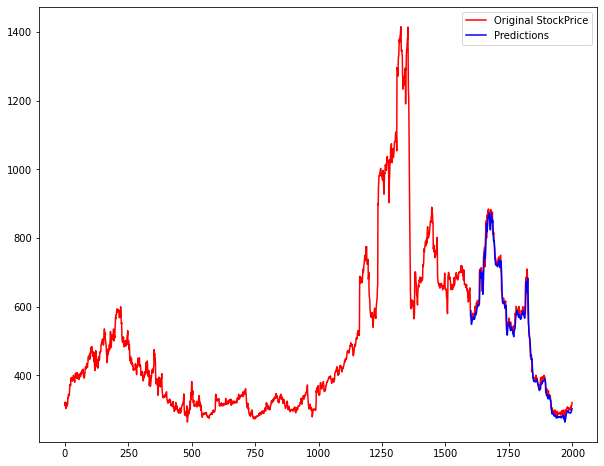

In [38]:
## visualize
fig, ax = plt.subplots(figsize=(10,8))
plt.plot(data, color='red', label='Original StockPrice')
ax.plot(range(len(y_train)+50, len(y_train)+50+len(predictions)),predictions, color='blue', label='Predictions')
plt.legend()
print(range(len(y_train)+50, len(y_train)+50+len(predictions)))

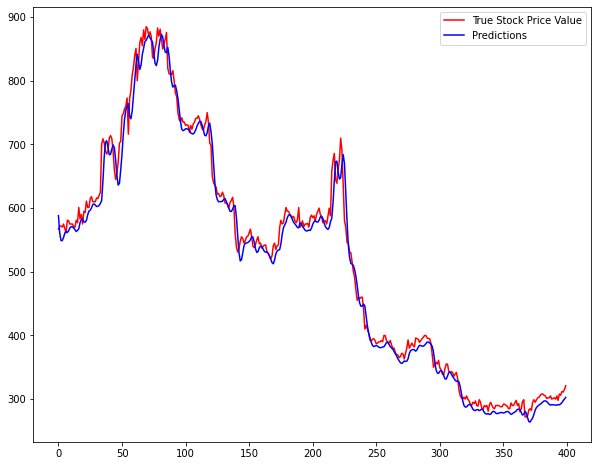

In [39]:
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1,1))

## visualize
fig, ax = plt.subplots(figsize=(10,8))
plt.plot(y_test_scaled, color='red', label='True Stock Price Value')
ax.plot(predictions, color='blue', label='Predictions')
plt.legend();